---
# 💼 Attrition in an Organization || Why Workers Quit?

---

Employees are the backbone of the organization. Organization's performance is heavily based on the quality of the employees. Challenges that an organization has to face due employee attrition are:

> 1. Expensive in terms of both money and time to train new employees.
> 1. Loss of experienced employees
> 1. Impact in productivity
> 1. Impact profit

Before getting our hands dirty with the data, first step is to frame the business question. Having clarity on below questions is very crucial because the solution that is being developed will make sense only if we have well stated problem.

------
## 📌 Business questions to brainstorm:
---
> 1. What factors are contributing more to employee attrition?
> 1. What type of measures should the company take in order to retain their employees?
> 1. What business value does the model bring?
> 1. Will the model save lots of money?
> 1. Which business unit faces the attrition problem?


### <b>Business Goal</b>
In the age of the Great Resignation, employee retention strategies have become a critical area of focus for many organizations. There are often a variety of reasons why employees leave an organization that vary from industry to industry. In this case study, I will examine some of the commonalities between former employees and identify key drivers of attrition to assist the HR Department strengthen their retention strategies and proactively reduce their attrition rates.  

### <b>Data Overview</b>
In this notebook, I will analyze IBM's on HR Analytics. The data consists of nearly 1,500 current and former employees with information related to their job satisfaction, work life balance, tenure, experience, salary, and demographic data. Below is a brief overview and summary statistics of the data.

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

# Importing libraries

In [71]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression

# Load data

In [72]:
df = pd.read_csv("D:\\Data\\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


---
# 📊 Exploratory Data Analysis

- Find patterns in data through data visualization. Reveal hidden secrets of the data through graphs, analysis and charts.
    - Univariate analysis
        > - Continous variables : Histograms, boxplots. This gives us understanding about the central tendency and spread
        > - Categorical variable : Bar chart showing frequency in each category
    - Bivariate analysis
        > - Continous & Continous : Scatter plots to know how continous variables interact with each other
        > - Categorical & categorical : Stacked column chart to show how the frequencies are spread between two categorical variables
        > - Categorical & Continous : Boxplots charts
- Detect outliers

In [73]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# First look

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [75]:
categoral_columns=["Department","EducationField","JobRole","MaritalStatus"]
label_columns=["OverTime","Attrition"]

In [76]:
for i in categoral_columns:
    print(df[i].value_counts())

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64
MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


In [77]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [78]:
df.duplicated().sum()

0

In [79]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

---
## 📉 Data Visualisation

In [80]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [81]:
# sns.pairplot(df,hue="Attrition")

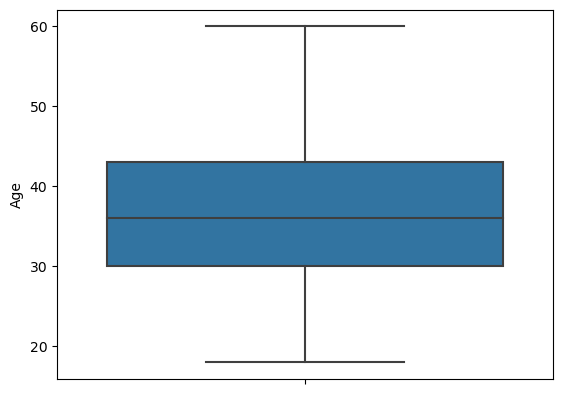

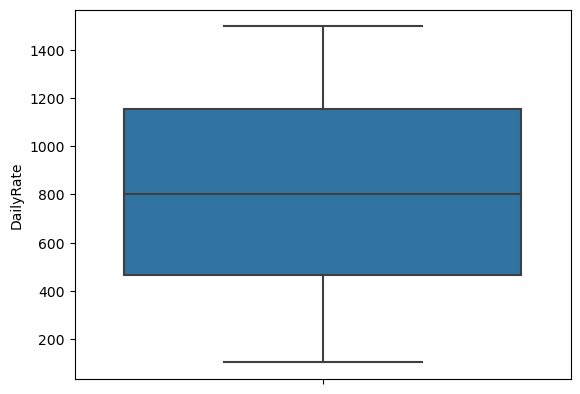

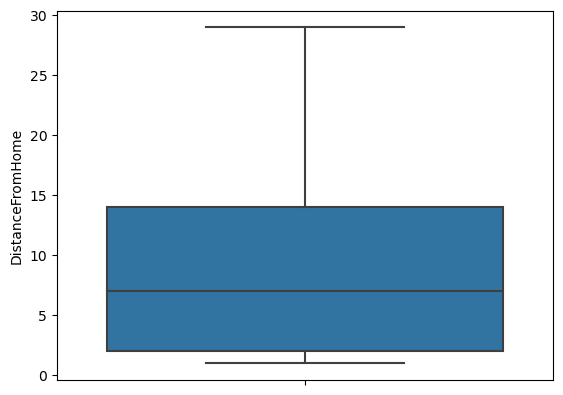

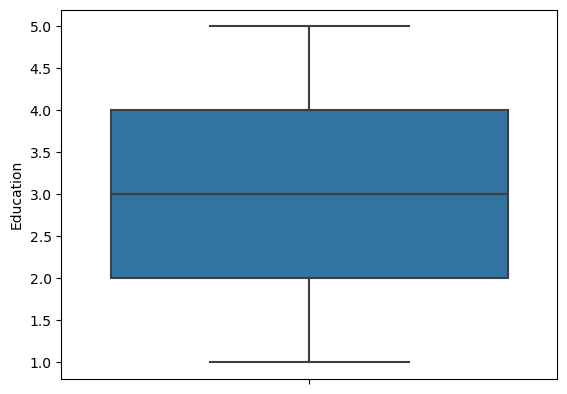

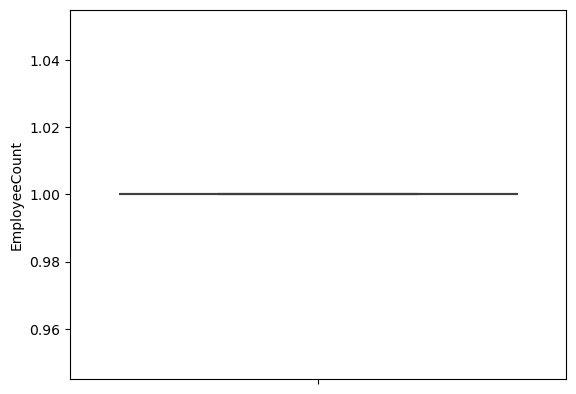

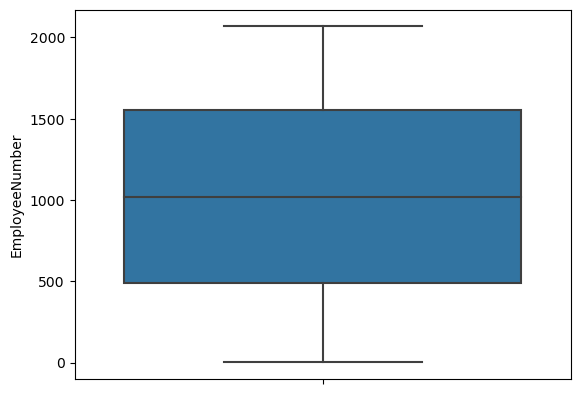

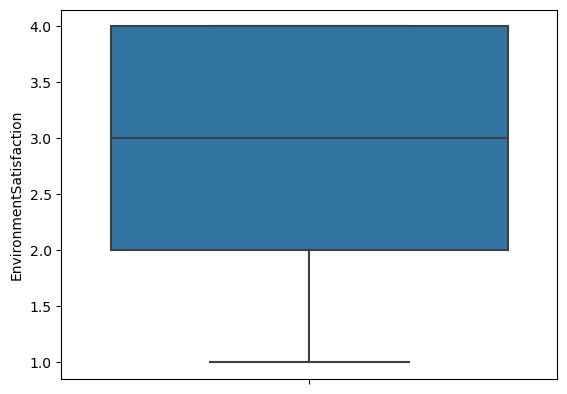

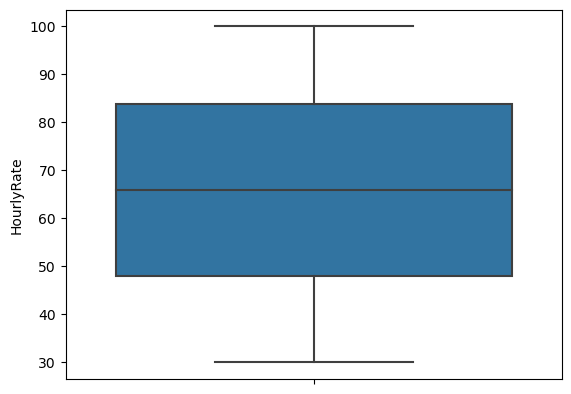

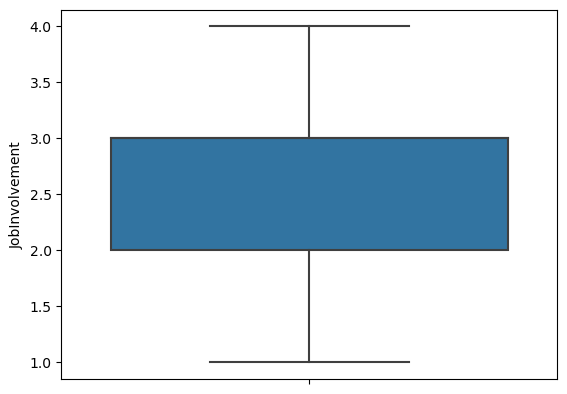

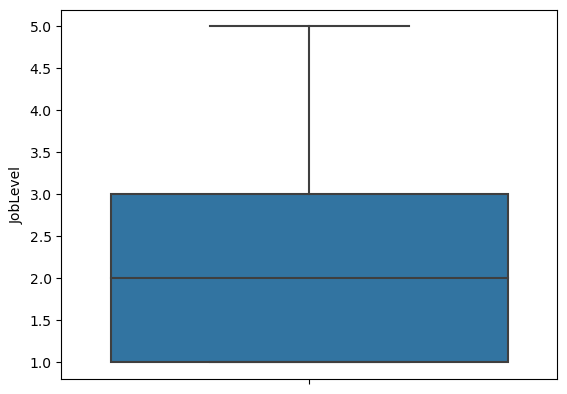

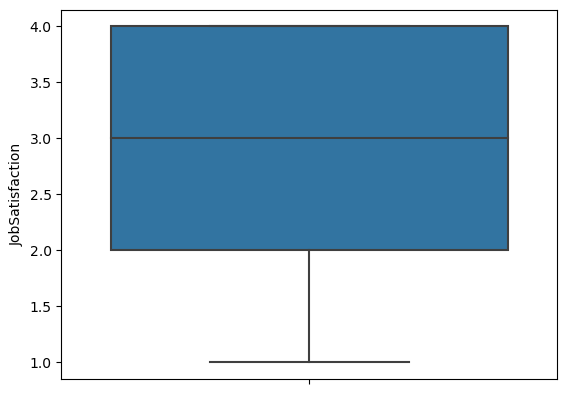

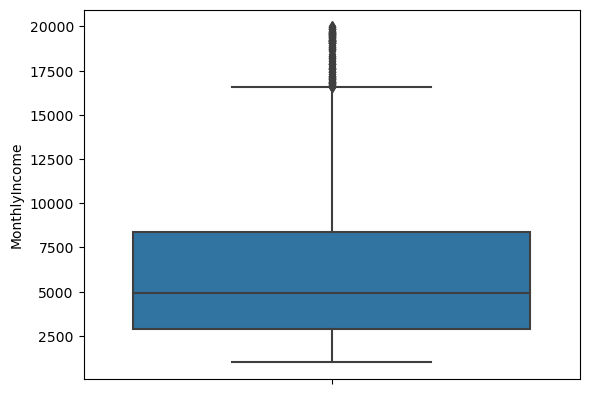

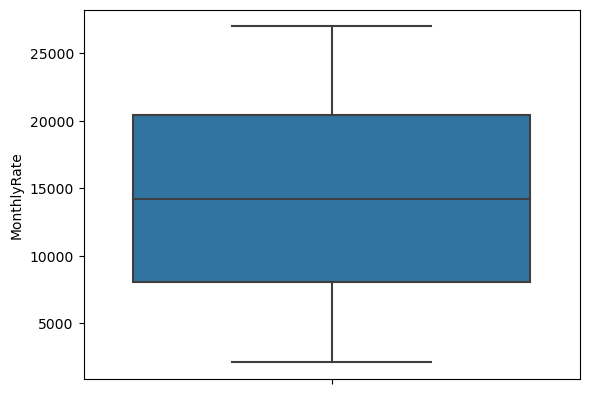

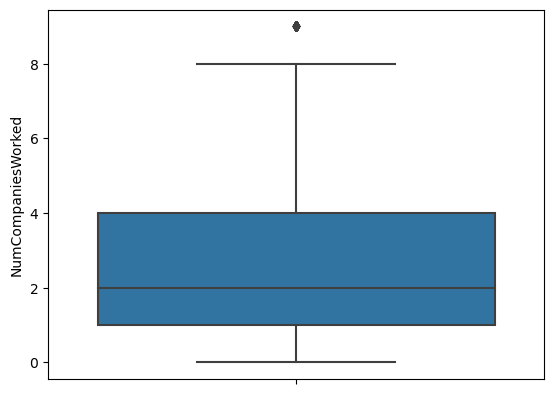

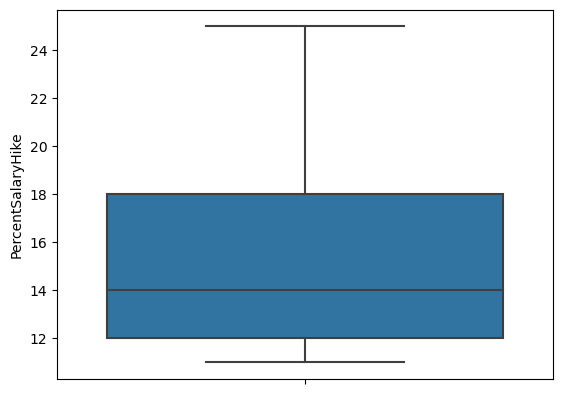

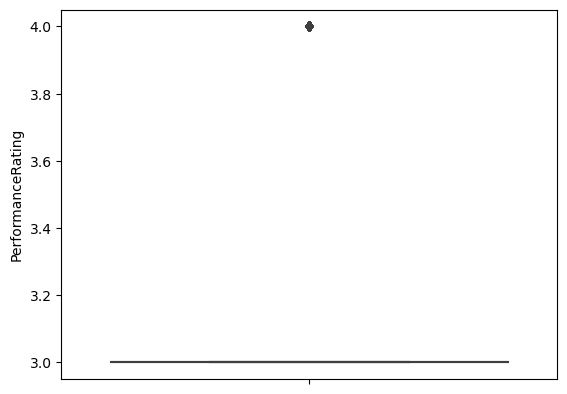

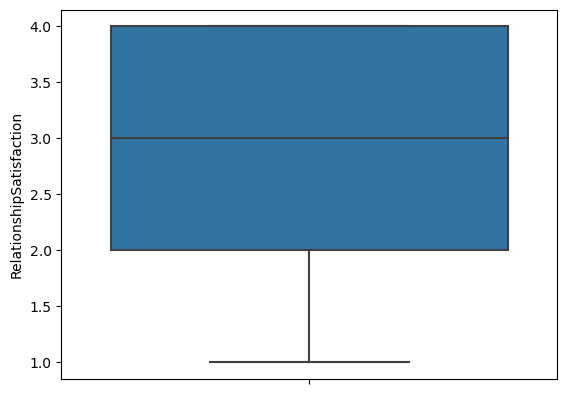

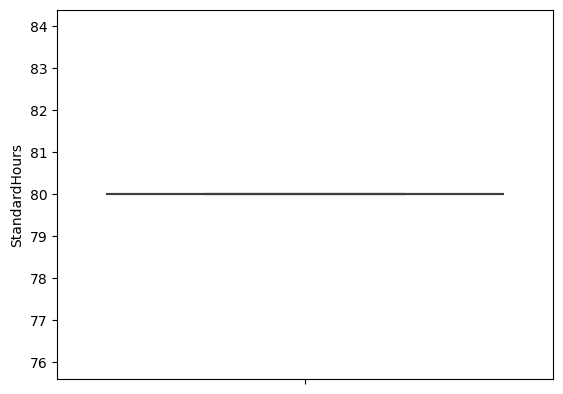

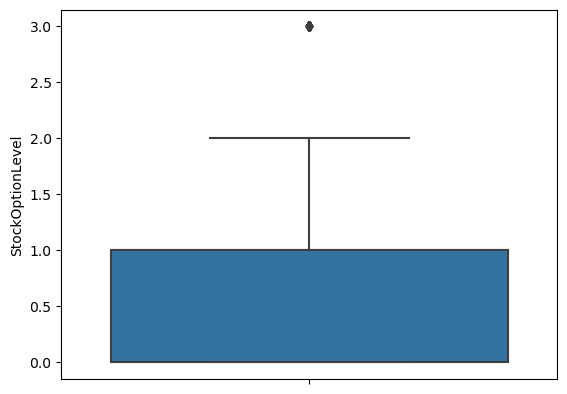

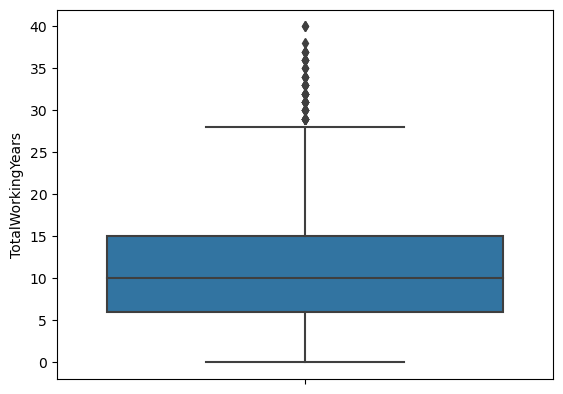

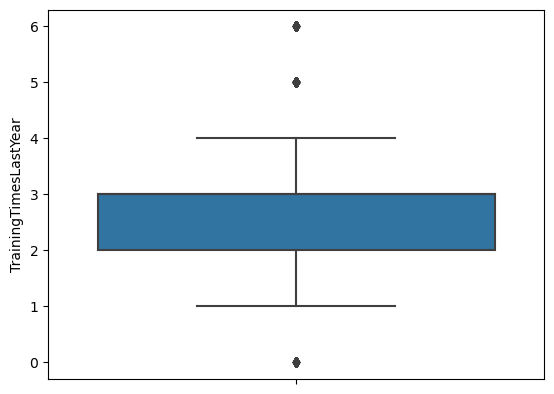

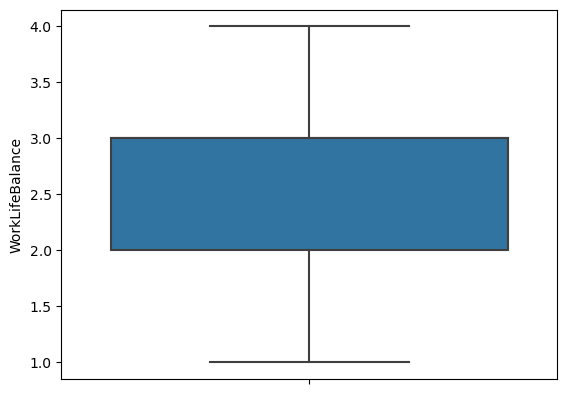

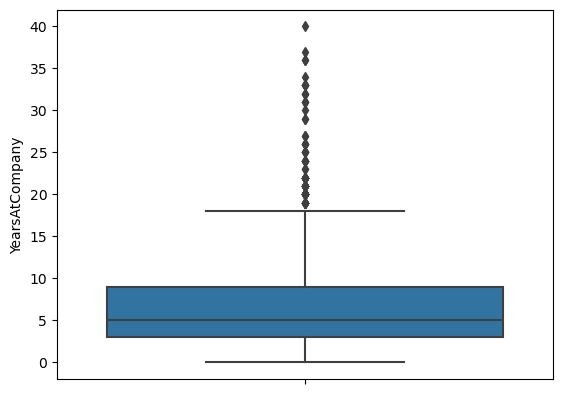

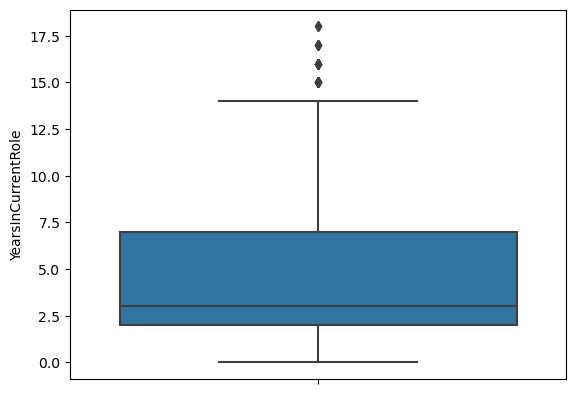

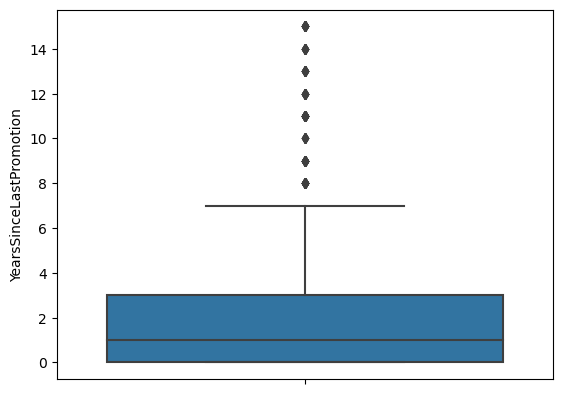

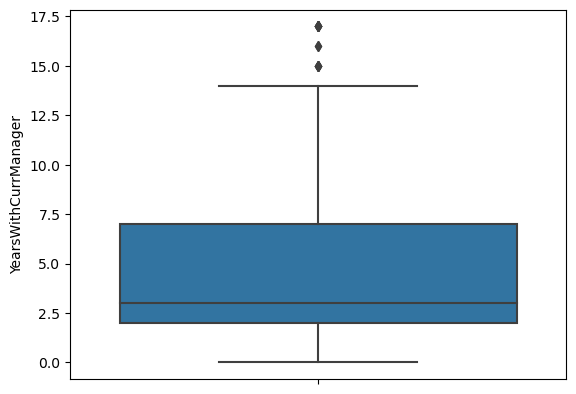

In [83]:
num_data=df.select_dtypes(include=['number'])
for i in num_data.columns:
    sns.boxplot(num_data,y=i)
    plt.show()

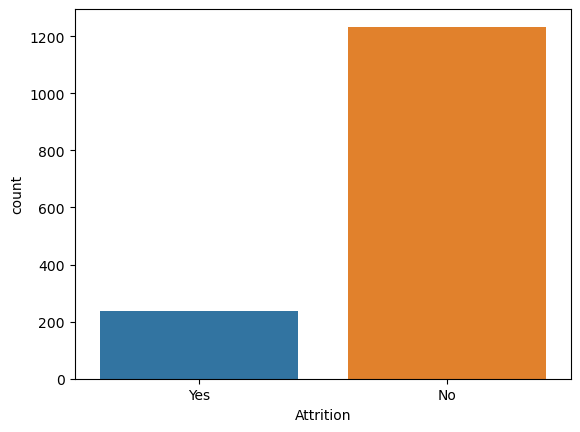

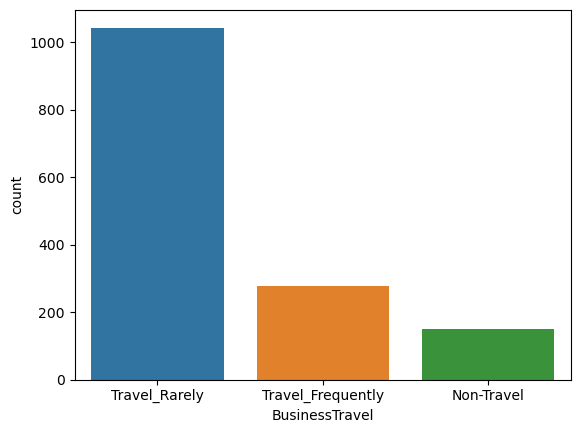

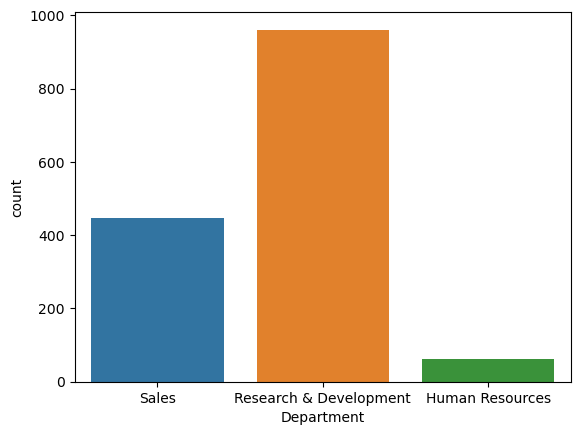

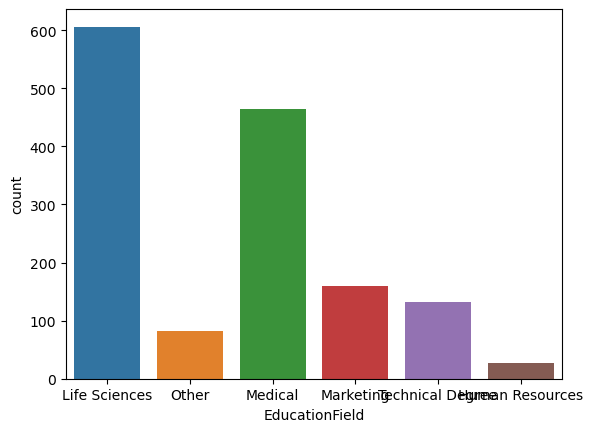

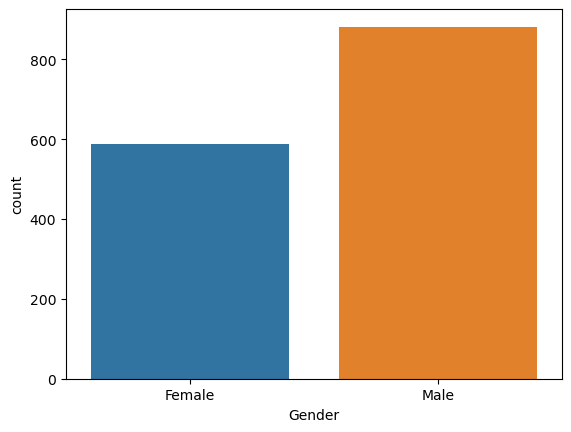

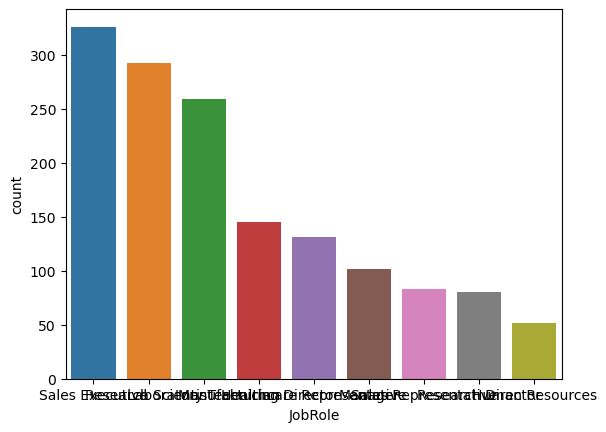

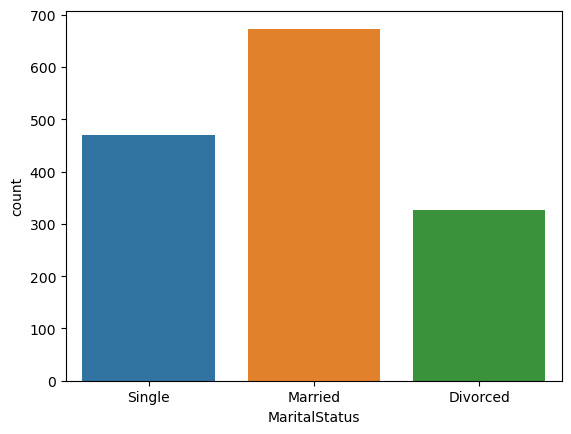

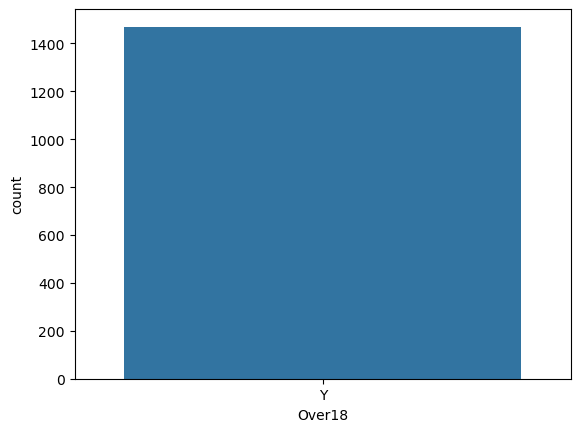

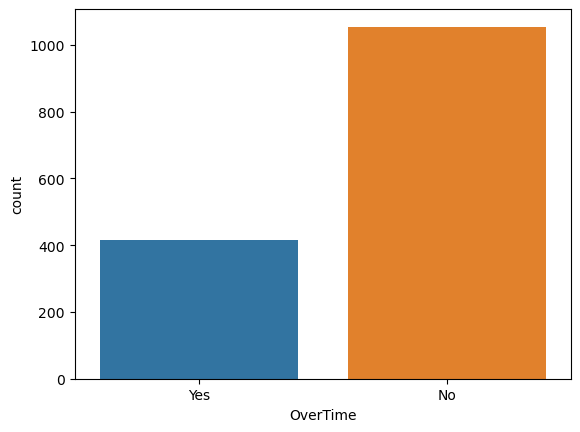

In [84]:
categ=df.select_dtypes(include=["object"])
for i in categ.columns:
    sns.countplot(categ,x=i)
    plt.show()


In [85]:
corr=num_data.corr()

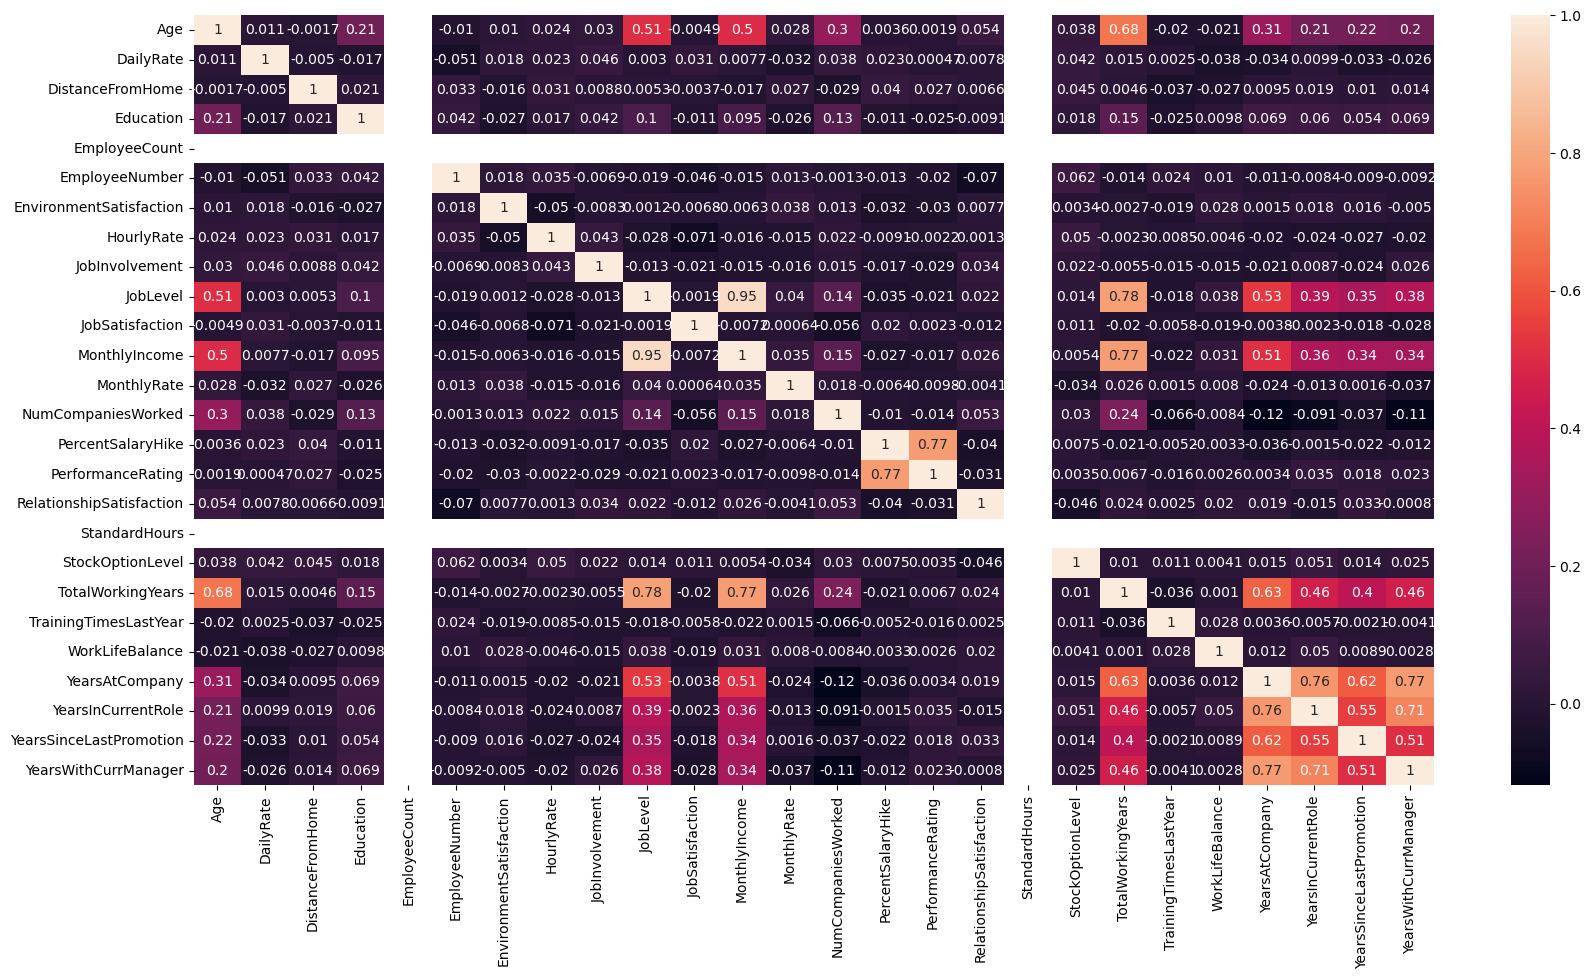

In [86]:

plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)
plt.show()

## 📌 Note

It seems that `EnvironmentSatisfaction`, `JobSatisfaction`, `PerformanceRating`, and `RelationshipSatisfaction` features don't have big impact on the detrmination of `Attrition` of employees.

***

## 📝 **Conclusions:**

***
- The workers with low `JobLevel`, `MonthlyIncome`, `YearAtCompany`, and `TotalWorkingYears` are more likely to quit there jobs.
- `BusinessTravel` : The workers who travel alot are more likely to quit then other employees.

- `Department` : The worker in `Research & Development` are more likely to stay then the workers on other departement.

- `EducationField` : The workers with `Human Resources` and `Technical Degree` are more likely to quit then employees from other fields of educations.

- `Gender` : The `Male` are more likely to quit.

- `JobRole` : The workers in `Laboratory Technician`, `Sales Representative`, and `Human Resources` are more likely to quit the workers in other positions.

- `MaritalStatus` : The workers who have `Single` marital status are more likely to quit the `Married`, and `Divorced`.

- `OverTime` : The workers who work more hours are likely to quit then others.

*** 

# Bivariate plots

There are some obvious correlations among the numerical columns:

* High correlation between Age and JobLevel, MonthlyIncome and TotalWorkingYears
* High correlation between JobLevel and MonthlyIncome
* High correlation between TotalWorkingYears and YearsSinceLastPromotion -> The longer you are working, the higher is the probability that you reached your "limit" in terms of promotion

* Nearly half of the Sales Representatives went from the company away
* Most of the people were traveling rarely and Sales is the department with the highest attrition (but also with the most employees overall)

In [87]:
df.groupby("Gender")["YearsSinceLastPromotion"].mean()

Gender
Female    2.294218
Male      2.116780
Name: YearsSinceLastPromotion, dtype: float64

In [88]:
df.groupby("Gender")["PerformanceRating"].mean()

Gender
Female    3.159864
Male      3.149660
Name: PerformanceRating, dtype: float64

Females are waiting a bit longer for a promotion than men, although having a better performance rating

# Data Preprocessing

---
# 🔨 Data Processing

## Drop unnecessary columns

Those columns have only one value

In [89]:
df.drop(["Over18"],axis=1,inplace=True)

## Label Encoding for Target `Attrition`

In [90]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
Attrition_label=label.fit_transform(df["Attrition"])
Overtime_label=label.fit_transform(df["OverTime"])
Gender_label=label.fit_transform(df["Gender"])

In [91]:
df["Attrition_label"]=Attrition_label
df["Overtime_label"]=Overtime_label
df["Gender_label"]=Gender_label

In [92]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_label,Overtime_label,Gender_label
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,1,1,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,0,0,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,1,1,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,0,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,6,3,3,2,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,17,3,3,5,2,0,3,0,0,1
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,9,5,3,7,7,1,7,0,0,1
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,6,0,3,6,2,0,3,0,1,1
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,17,3,2,9,6,0,8,0,0,1


In [93]:
df.drop(["OverTime","Attrition","Gender"],axis=1,inplace=True)

## <b><span style='color:#68A19B'>I.</span>  Encode Categorical Columns</b>

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [95]:
categ=df.select_dtypes(include=["object"])
for i in categ.columns:
    print (categ[i].value_counts())


BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64
MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [99]:
# Select categorical columns from the DataFrame
categ = df.select_dtypes(include=["object"])

# Initialize the OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)

# Fit and transform the categorical data
cat_data = cat_encoder.fit_transform(categ)

# Create a DataFrame with the encoded categorical data
columns_categorical = pd.DataFrame(cat_data, columns=cat_encoder.get_feature_names_out(categ.columns))

# Reset index to match the original DataFrame, if needed
columns_categorical.index = categ.index

# Optionally, you can merge this with the original DataFrame (excluding the original categorical columns)
df_final = pd.concat([df.drop(columns=categ.columns), columns_categorical], axis=1)

In [103]:
from sklearn.preprocessing import OneHotEncoder
categ=df.select_dtypes(include=["object"])

cat_encoder=OneHotEncoder(sparse=False)
cat_data=cat_encoder.fit_transform(categ)
columns_categoral=pd.DataFrame(cat_data,columns=cat_encoder.get_feature_names_out(categ.columns))
columns_categoral.index=categ.index

C:\Users\GIGABYTE\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [107]:
final_df=pd.concat([df.drop(columns=categ.columns),columns_categoral],axis=1)


In [109]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   DailyRate                          1470 non-null   int64  
 2   DistanceFromHome                   1470 non-null   int64  
 3   Education                          1470 non-null   int64  
 4   EmployeeCount                      1470 non-null   int64  
 5   EmployeeNumber                     1470 non-null   int64  
 6   EnvironmentSatisfaction            1470 non-null   int64  
 7   HourlyRate                         1470 non-null   int64  
 8   JobInvolvement                     1470 non-null   int64  
 9   JobLevel                           1470 non-null   int64  
 10  JobSatisfaction                    1470 non-null   int64  
 11  MonthlyIncome                      1470 non-null   int64

In [111]:
corr=final_df.corr()

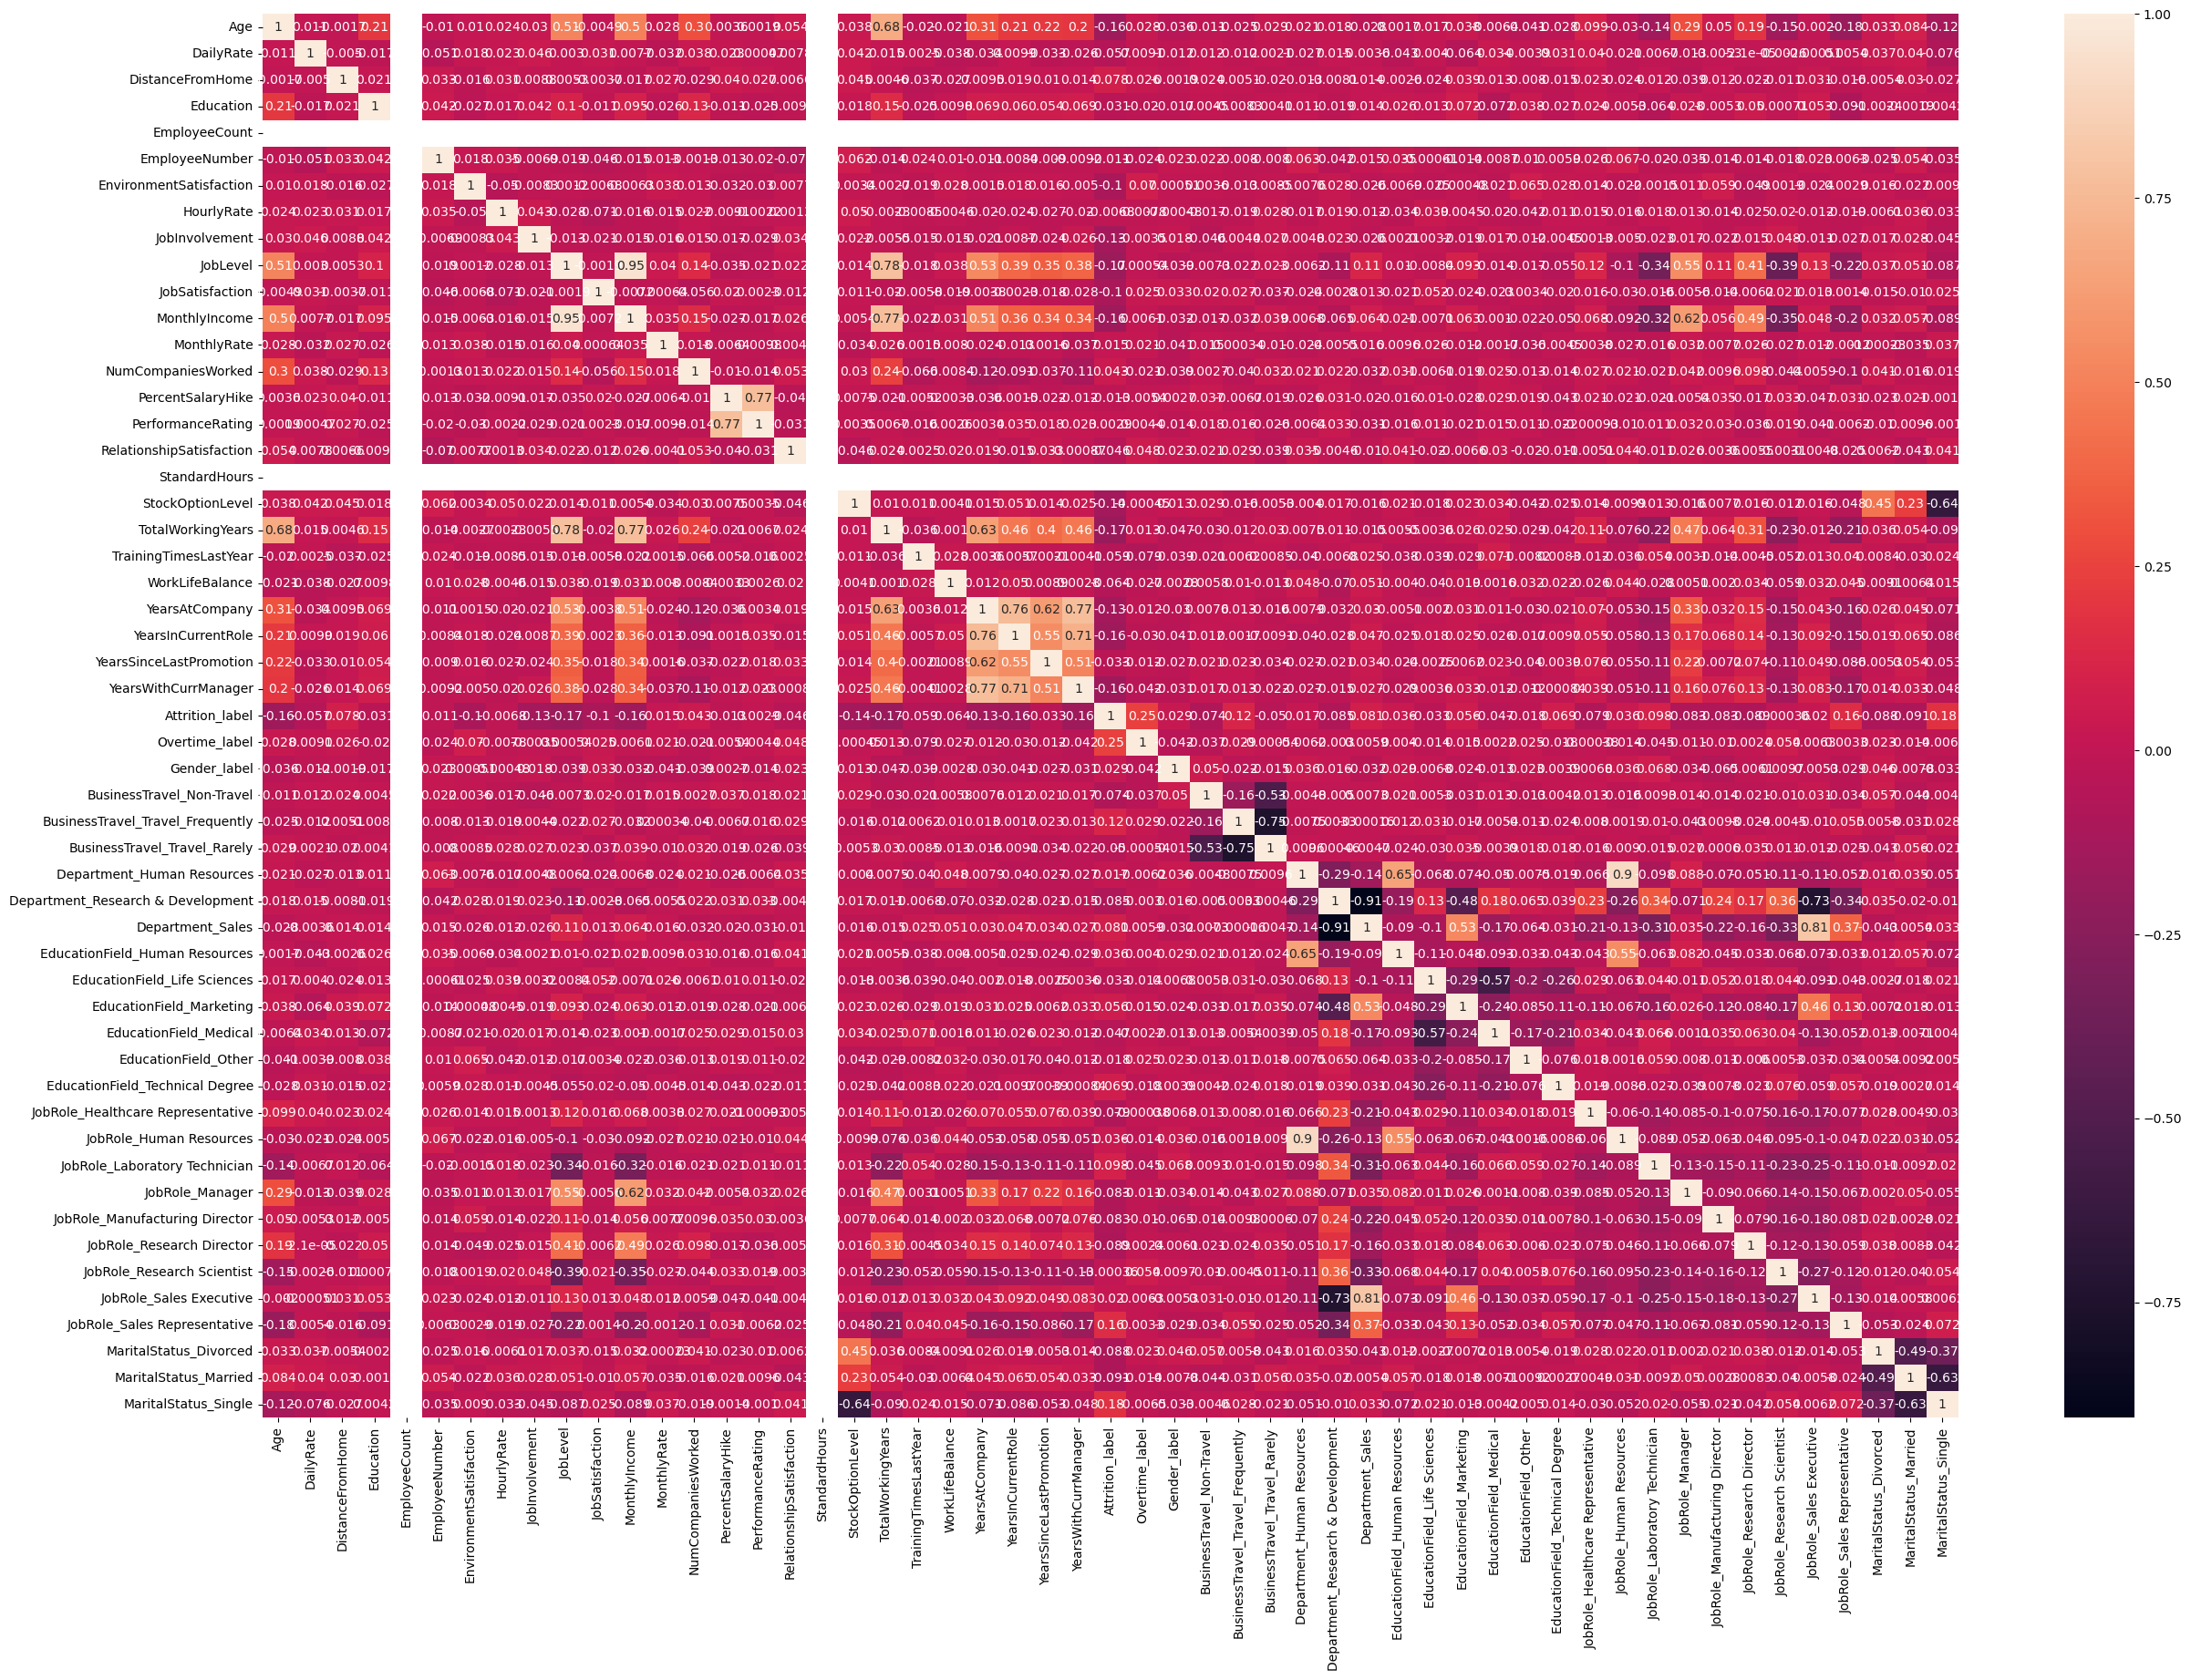

In [116]:

plt.figure(figsize=(30,20))
sns.heatmap(corr,annot=True)
plt.show()

## <b><span style='color:#68A19B'>II.</span> Create Training and Test Sets</b>

In [122]:
X=final_df.drop(columns=["Attrition_label"],axis=1)
y=final_df["Attrition_label"]

In [123]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## <b><span style='color:#68A19B'>III.</span> Scale Features</b>

In [124]:
from sklearn.preprocessing import StandardScaler

In [126]:
std=StandardScaler()

In [128]:
X_train_scaled=std.fit_transform(X_train)
X_test_scaled=std.fit_transform(X_test)

# 🤖 Applying machine learning algorithms

## ✔️ Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
log=LogisticRegression()

In [131]:
log.fit(X_train,y_train)

C:\Users\GIGABYTE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [132]:
y_pred=log.predict(X_test)

In [134]:
comper=pd.DataFrame({"Predict":y_pred,
                        "Actual":y_test})

In [135]:
comper

,Predict,Actual
1041,0,0
184,0,0
1222,1,1
67,0,0
220,0,0
...,...,...
1047,0,0
331,0,0
323,0,1
654,0,0


In [139]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [137]:
con=confusion_matrix(y_test,y_pred)

In [140]:
acc=accuracy_score(y_test,y_pred)*100

In [141]:
acc

86.39455782312925

In [148]:
con

array([[380,   0],
       [ 60,   1]], dtype=int64)

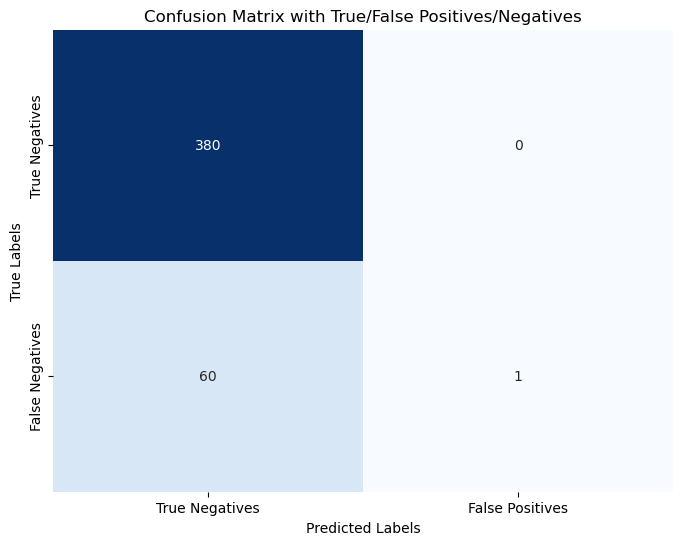

In [153]:
labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
cm_labels = np.array(labels).reshape(2, 2)

# Plotting the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(con, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=cm_labels[0], yticklabels=cm_labels[:,0])

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix with True/False Positives/Negatives")
plt.show()